<a href="https://colab.research.google.com/github/santhoshbvsrk/Machine-Learning-Projects/blob/main/BlackFridaySales/BlackFridaySales_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [4]:
url="https://raw.githubusercontent.com/santhoshbvsrk/Machine-Learning-Projects/main/BlackFridaySales/train.csv"
df=pd.read_csv(url)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Looks like there are multiple entries for few customers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Looks like there are null values in Product_Category_2 & Product_Category_3

In [6]:
#filling null values with 0
df = df.fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##### From the above we can say that our Target Variable i.e., Purchase is an integer value which means we've to perform Linear Regression on it.
##### So, we'll convert all categorical variables into Numerical

In [8]:
df[df.duplicated(subset='User_ID')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


##### As part of cleaning up data, as there are multiple entries for the same customer/userid. We'll group them i.e., we'll have a single entry for customer/userid and sum up their relevant numeric data and reset their index.

In [9]:
data_numeric = df[["User_ID", "Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]].groupby("User_ID").sum().reset_index().drop("User_ID", axis=1)

In [10]:
data_numeric

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,213,132.0,148.0,334093
1,354,539.0,359.0,810472
2,93,117.0,148.0,341635
3,33,102.0,127.0,206468
4,659,642.0,207.0,821001
...,...,...,...,...
5886,3200,3403.0,1509.0,4116058
5887,938,894.0,456.0,1119538
5888,83,93.0,51.0,90034
5889,439,580.0,324.0,590319


##### Now let us drop duplicates from the categorical fields as we can't group and sum up categorical values and reset the index.

In [11]:
data_categorical = df.drop_duplicates('User_ID')[["User_ID", "Gender", "Age", "Occupation","City_Category", "Stay_In_Current_City_Years", "Marital_Status"]].reset_index().drop(["index"], axis=1)

In [12]:
data_categorical

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...
5886,1004588,F,26-35,4,C,0,0
5887,1004871,M,18-25,12,C,2,0
5888,1004113,M,36-45,17,C,3,0
5889,1005391,M,26-35,7,A,0,0


###### Let us save the duplicate free data in a new data frame

In [13]:
data=pd.concat([data_numeric,data_categorical],axis=1)
data

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,213,132.0,148.0,334093,1000001,F,0-17,10,A,2,0
1,354,539.0,359.0,810472,1000002,M,55+,16,C,4+,0
2,93,117.0,148.0,341635,1000003,M,26-35,15,A,3,0
3,33,102.0,127.0,206468,1000004,M,46-50,7,B,2,1
4,659,642.0,207.0,821001,1000005,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5886,3200,3403.0,1509.0,4116058,1004588,F,26-35,4,C,0,0
5887,938,894.0,456.0,1119538,1004871,M,18-25,12,C,2,0
5888,83,93.0,51.0,90034,1004113,M,36-45,17,C,3,0
5889,439,580.0,324.0,590319,1005391,M,26-35,7,A,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Product_Category_1          5891 non-null   int64  
 1   Product_Category_2          5891 non-null   float64
 2   Product_Category_3          5891 non-null   float64
 3   Purchase                    5891 non-null   int64  
 4   User_ID                     5891 non-null   int64  
 5   Gender                      5891 non-null   object 
 6   Age                         5891 non-null   object 
 7   Occupation                  5891 non-null   int64  
 8   City_Category               5891 non-null   object 
 9   Stay_In_Current_City_Years  5891 non-null   object 
 10  Marital_Status              5891 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 506.4+ KB


##### Let us convert the numerical variables to int from float

In [15]:
data[['Product_Category_2','Product_Category_3']]=data[['Product_Category_2','Product_Category_3']].astype('int64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product_Category_1          5891 non-null   int64 
 1   Product_Category_2          5891 non-null   int64 
 2   Product_Category_3          5891 non-null   int64 
 3   Purchase                    5891 non-null   int64 
 4   User_ID                     5891 non-null   int64 
 5   Gender                      5891 non-null   object
 6   Age                         5891 non-null   object
 7   Occupation                  5891 non-null   int64 
 8   City_Category               5891 non-null   object
 9   Stay_In_Current_City_Years  5891 non-null   object
 10  Marital_Status              5891 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 506.4+ KB


#### Let us perform the visualizing part for better understanding of the data

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

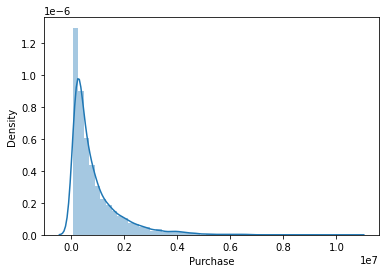

In [18]:
sns.distplot(data['Purchase'])
sns.set(rc={'figure.figsize':(10,10)})


##### From this plot we can say that Target Variable i.e., Purchase is normally distributed except that it is left skewed

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product_Category_1          5891 non-null   int64 
 1   Product_Category_2          5891 non-null   int64 
 2   Product_Category_3          5891 non-null   int64 
 3   Purchase                    5891 non-null   int64 
 4   User_ID                     5891 non-null   int64 
 5   Gender                      5891 non-null   object
 6   Age                         5891 non-null   object
 7   Occupation                  5891 non-null   int64 
 8   City_Category               5891 non-null   object
 9   Stay_In_Current_City_Years  5891 non-null   object
 10  Marital_Status              5891 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 506.4+ KB


Univariate Analysis

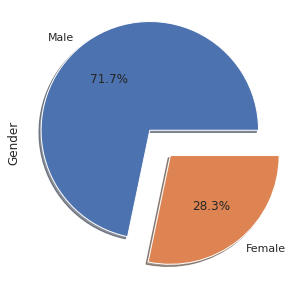

In [20]:
data['Gender'].value_counts().plot(labels=['Male','Female'],kind='pie',explode=[0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From the above pie plot we can say that there are more Male customers than that of Female

In [21]:
data['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

As there are only 2 possible values in Marital_Status which says Married or Single, let us plot a pie chart again to see their distribution in %

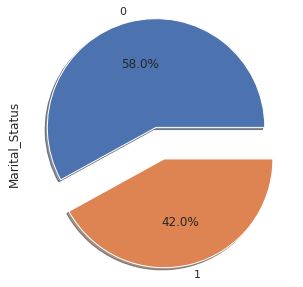

In [22]:
data['Marital_Status'].value_counts().plot(kind='pie',explode=[0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From this pie plot we can say that customers with Marital-Status=0 are more in number when compared to that of 1

In [23]:
data['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

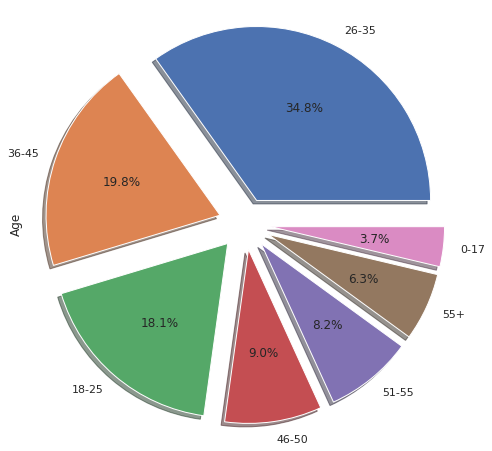

In [24]:
data['Age'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15,0.15,0.15,0.15,0.15], autopct='%3.1f%%',figsize=(8,8),shadow=True)
plt.show()

From this pie plot we can say that people in the age group of 26-35 are more in number

In [25]:
data['Stay_In_Current_City_Years'].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

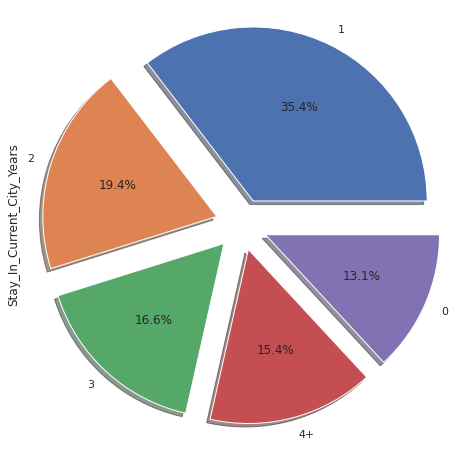

In [26]:
data['Stay_In_Current_City_Years'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15,0.15,0.15], autopct='%3.1f%%',figsize=(8,8),shadow=True)
plt.show()

From this pie plot we can say that people who are in City since last year are more in number in terms of participation in Sales

In [27]:
data['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

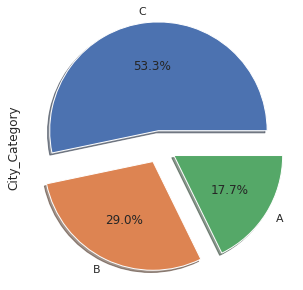

In [28]:
data['City_Category'].value_counts().plot(kind='pie',explode=[0.15,0.15,0.15], autopct='%3.1f%%',figsize=(5,5),shadow=True)
plt.show()

From this pie plot we can say that people from City_Cateogry=C are more in number in terms of participation in Sales

Bi-Variate Analysis

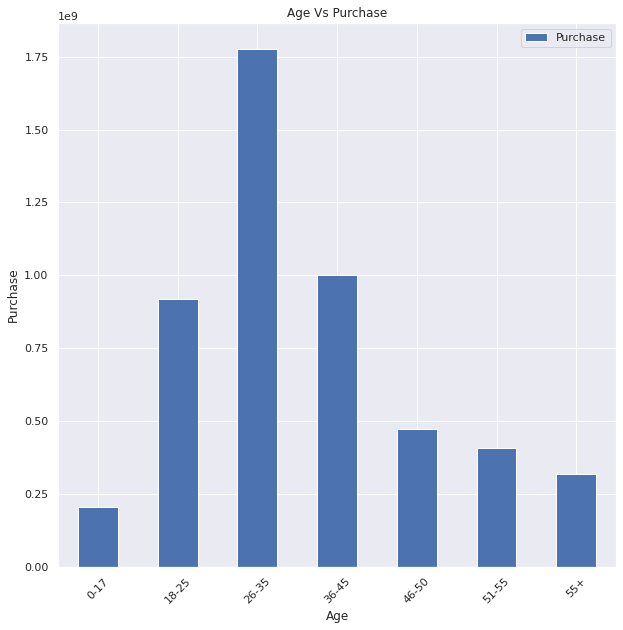

In [29]:
data.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age Vs Purchase")
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.show()

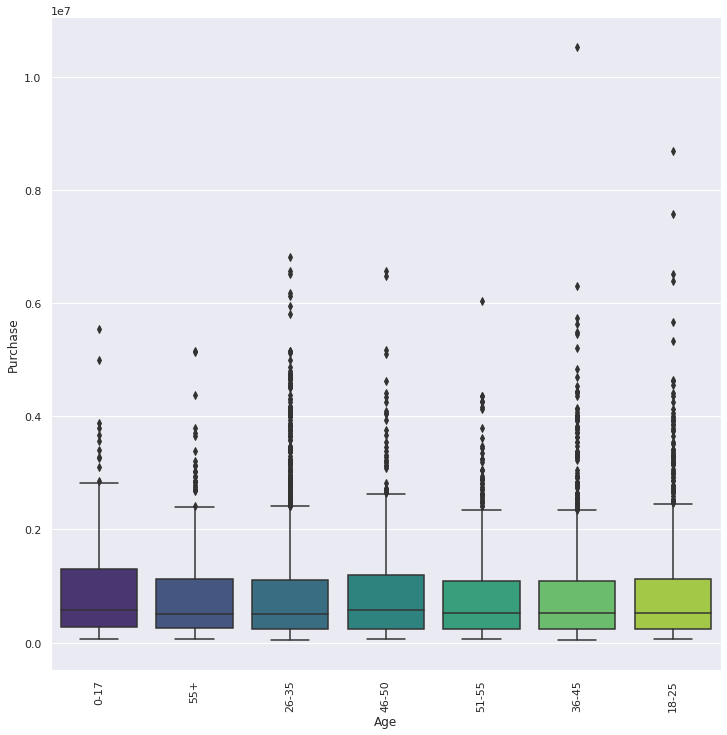

In [30]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data, x='Age', y='Purchase', palette='viridis')
plt.xticks(rotation=90)
plt.show()

From this plot we can say that people in Age Group 26-35 contributed to more purchase followed by 36-45 & 18-25

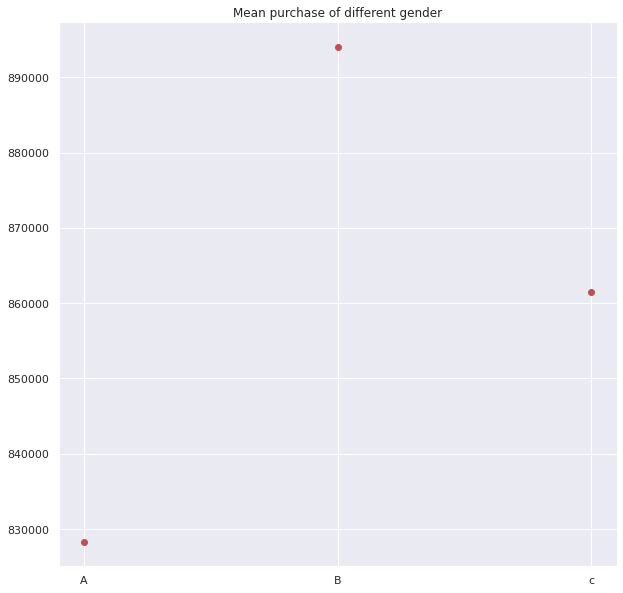

In [31]:
x = data.groupby(["City_Category"]).mean()[["Purchase"]].index
y = data.groupby(["City_Category"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["A","B","c"])
plt.title("Mean purchase of different gender")
sns.despine()

From this plot we can say that people from City_Category=B Contributed more towards the sales followed by C & A.

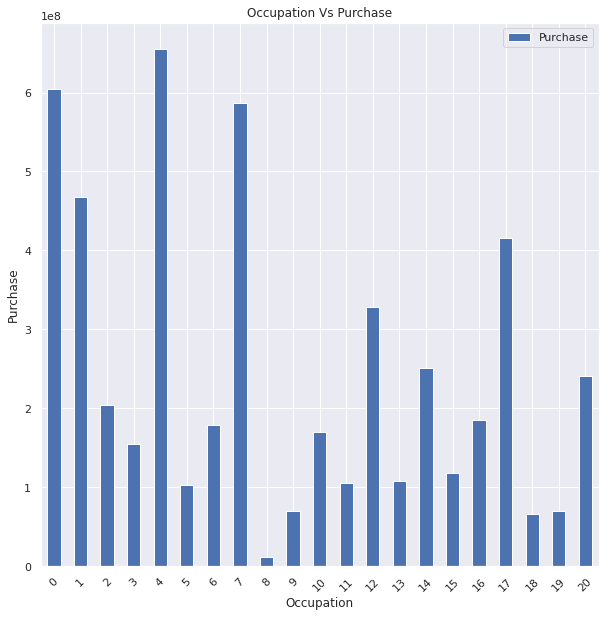

In [32]:
data.groupby(["Occupation"]).sum()[["Purchase"]].plot.bar(title="Occupation Vs Purchase")
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()

From this plot we can say that people in Occupation=4 have contributed more towards the sales

In [33]:
data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].index

Index(['0', '1', '2', '3', '4+'], dtype='object', name='Stay_In_Current_City_Years')

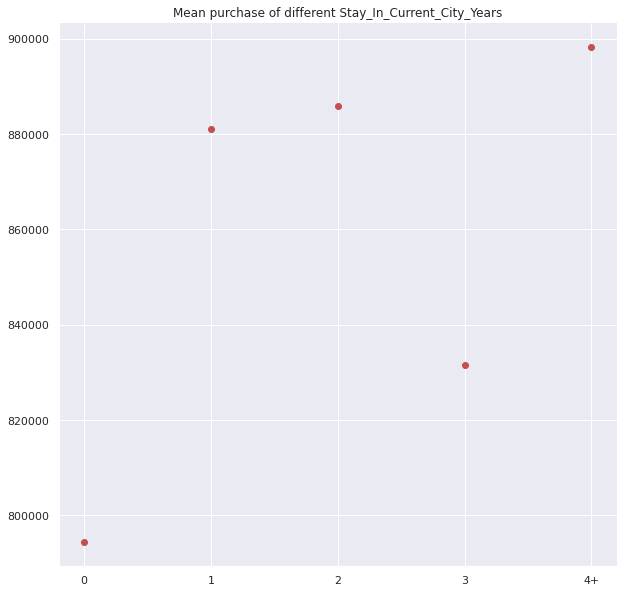

In [34]:
x = data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].index
y = data.groupby(["Stay_In_Current_City_Years"]).mean()[["Purchase"]].values
plt.plot(x, y,"ro")
plt.xticks(x, ["0","1","2","3","4+"])
plt.title("Mean purchase of different Stay_In_Current_City_Years")
sns.despine()

From this plot we can say that people who are in city since 4+ years contributed more towards the sales followed by 2 & 1 Years of stay in city

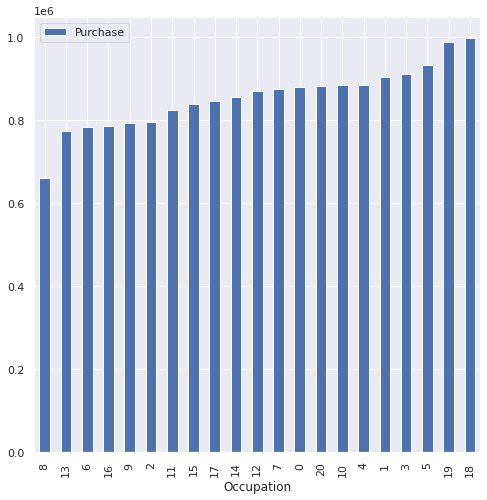

In [35]:
data.groupby(['Occupation']).mean()[['Purchase']].sort_values(by="Purchase").plot(kind='bar',figsize=(8,8))
plt.show()

From this plot we can say that people in Occupation Code 18 contributed more towards the sales.

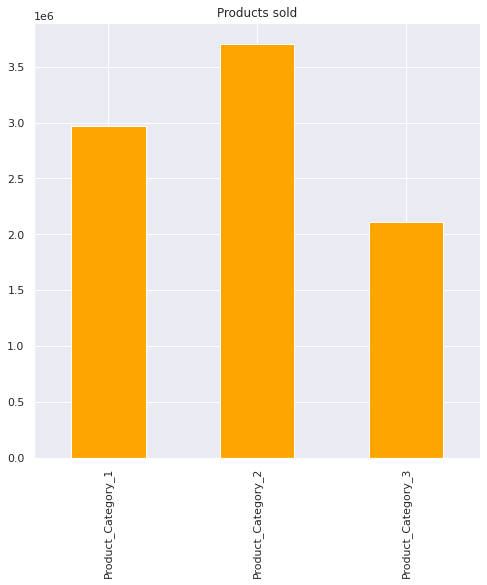

In [36]:
data.sum()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Products sold", color="orange",figsize=(8,8))
plt.show()

From this plot we can say that Product_Category_2 is highly sold followed by Product_Category_1

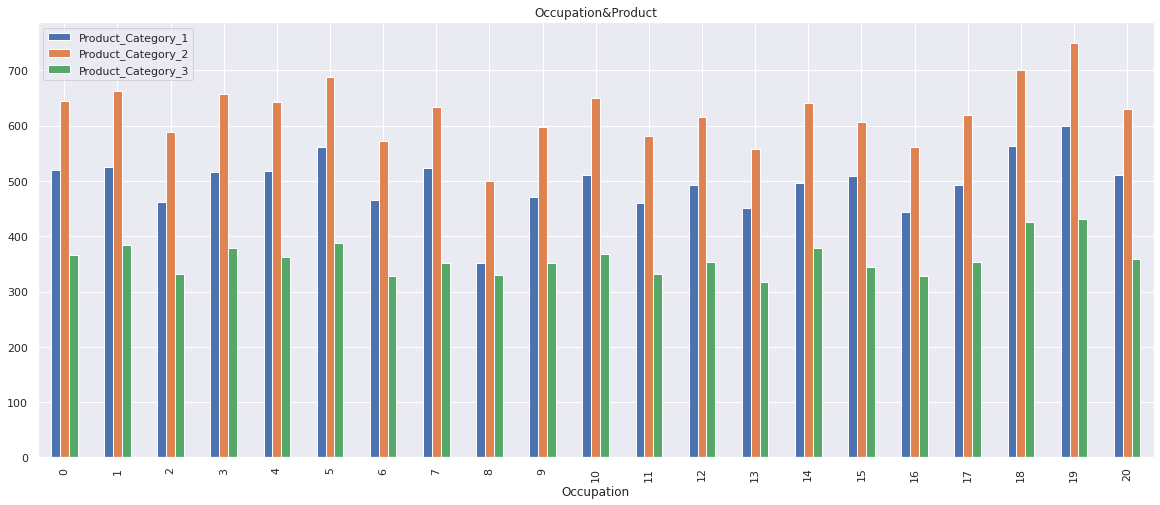

In [37]:
data.groupby(["Occupation"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="Occupation&Product",figsize=(20,8))
plt.show()

From this plot we can say that Product_Category_2 is more preferred and more products across categories are choosen by those with OccupationCode=19

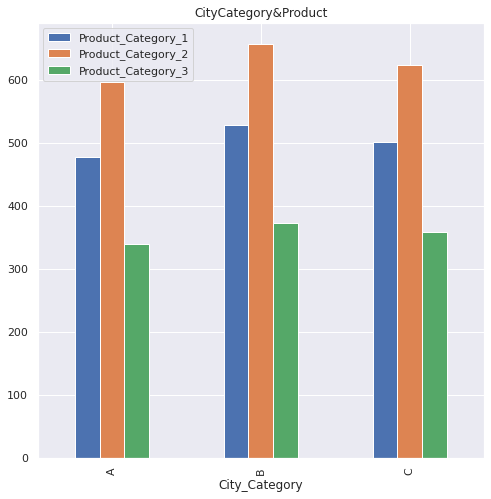

In [38]:
data.groupby(["City_Category"]).mean()[["Product_Category_1", "Product_Category_2", "Product_Category_3"]].plot.bar(title="CityCategory&Product",figsize=(8,8))
plt.show()

From this we can say that Product_Category_2 is more preferred and people in CityCategory=B have opted for more Products.

Now, Let us see the correlation between the features i.e., find the feature of high importance

For finding the correlation between features, let us convert all features to numerical

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cat_col = data.select_dtypes(include="object").columns.tolist()
for i in cat_col:
    data.loc[:, i] = le.fit_transform(data.loc[:, i])

1. Let us try this with a HeatMap first

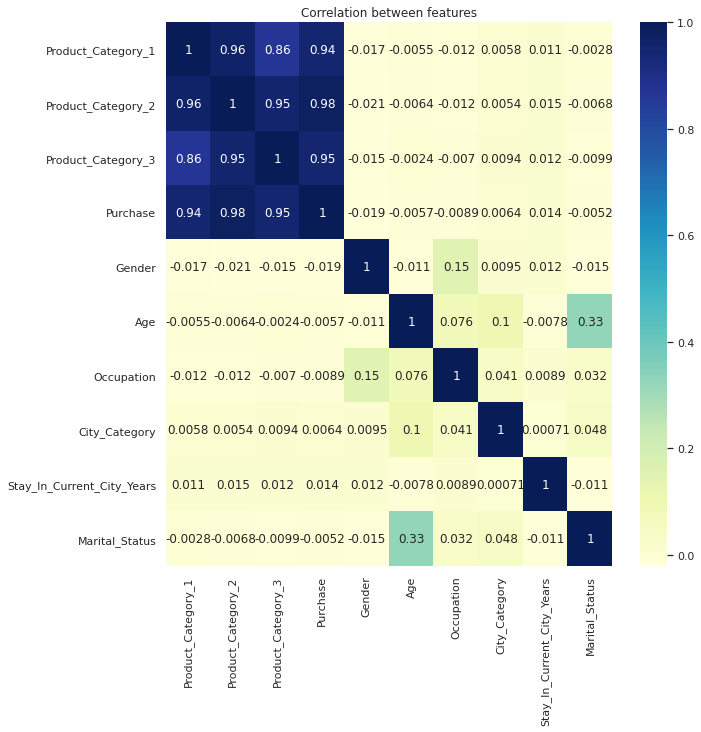

In [40]:
sns.heatmap(data.drop("User_ID", axis=1).corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")
sns.set(rc={'figure.figsize':(15,15)})

* From this Heatmap we can say that Product_Category_2 is highly correlated to Purchase followed by Product_Category_3 & Product_Category_1.
* Age is highly correlated with Marital_status.
* Occupation is correlated with Gender

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Product_Category_1          5891 non-null   int64
 1   Product_Category_2          5891 non-null   int64
 2   Product_Category_3          5891 non-null   int64
 3   Purchase                    5891 non-null   int64
 4   User_ID                     5891 non-null   int64
 5   Gender                      5891 non-null   int64
 6   Age                         5891 non-null   int64
 7   Occupation                  5891 non-null   int64
 8   City_Category               5891 non-null   int64
 9   Stay_In_Current_City_Years  5891 non-null   int64
 10  Marital_Status              5891 non-null   int64
dtypes: int64(11)
memory usage: 506.4 KB


Feature: 0, Score: 546.67226
Feature: 1, Score: 354.28733
Feature: 2, Score: 951.47876
Feature: 3, Score: -0.01538
Feature: 4, Score: -3363.17092
Feature: 5, Score: -1179.06623
Feature: 6, Score: 239.22759
Feature: 7, Score: -897.74473
Feature: 8, Score: 1272.93221
Feature: 9, Score: 3919.43264


<Figure size 360x360 with 0 Axes>

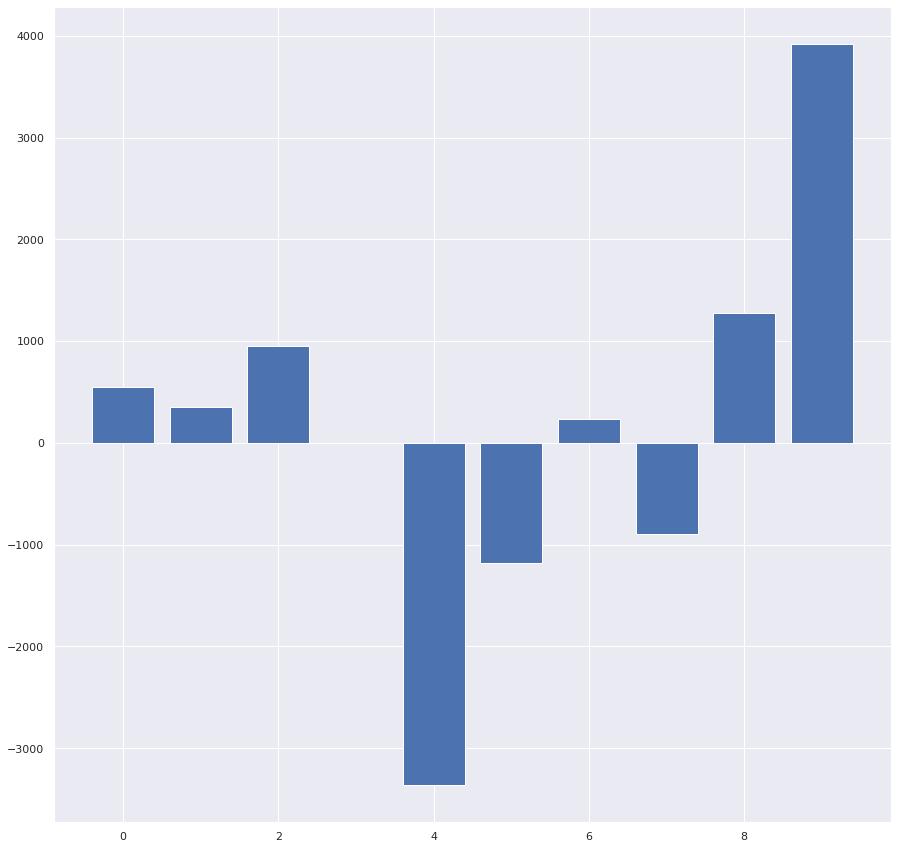

<Figure size 360x360 with 0 Axes>

In [42]:
# linear regression feature importance
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# define dataset
X = data.drop("Purchase",axis=1)  #independent columns
y = data['Purchase']    #target column i.e price range
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_   
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize=(5,5))

Feature: 0, Score: 0.02416
Feature: 1, Score: 0.94653
Feature: 2, Score: 0.01311
Feature: 3, Score: 0.00563
Feature: 4, Score: 0.00078
Feature: 5, Score: 0.00250
Feature: 6, Score: 0.00338
Feature: 7, Score: 0.00113
Feature: 8, Score: 0.00203
Feature: 9, Score: 0.00076


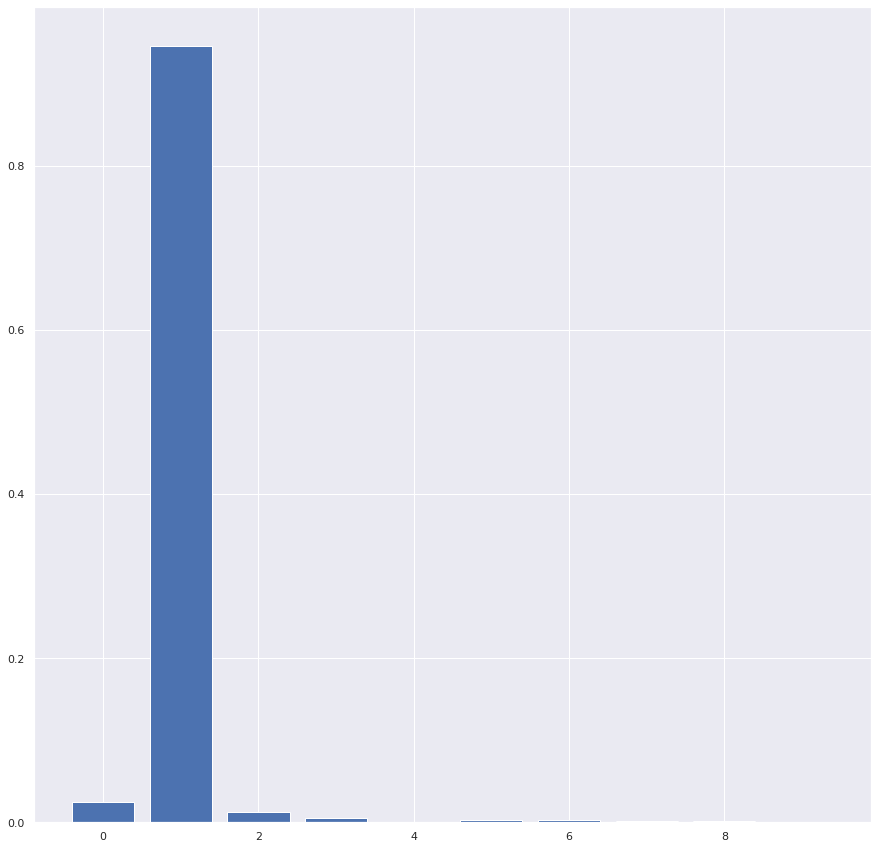

In [43]:
# RF Regressor for feature importance
from sklearn.ensemble import RandomForestRegressor
# define dataset
X = data.drop("Purchase",axis=1)  #independent columns
y = data['Purchase']    #target column i.e price range
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From this we can say that Product_Category_2 feature has highest importance and helps in predicting Sales.

[14:01:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.04666
Feature: 1, Score: 0.82310
Feature: 2, Score: 0.11121
Feature: 3, Score: 0.00255
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00263
Feature: 6, Score: 0.00377
Feature: 7, Score: 0.00117
Feature: 8, Score: 0.00597
Feature: 9, Score: 0.00295


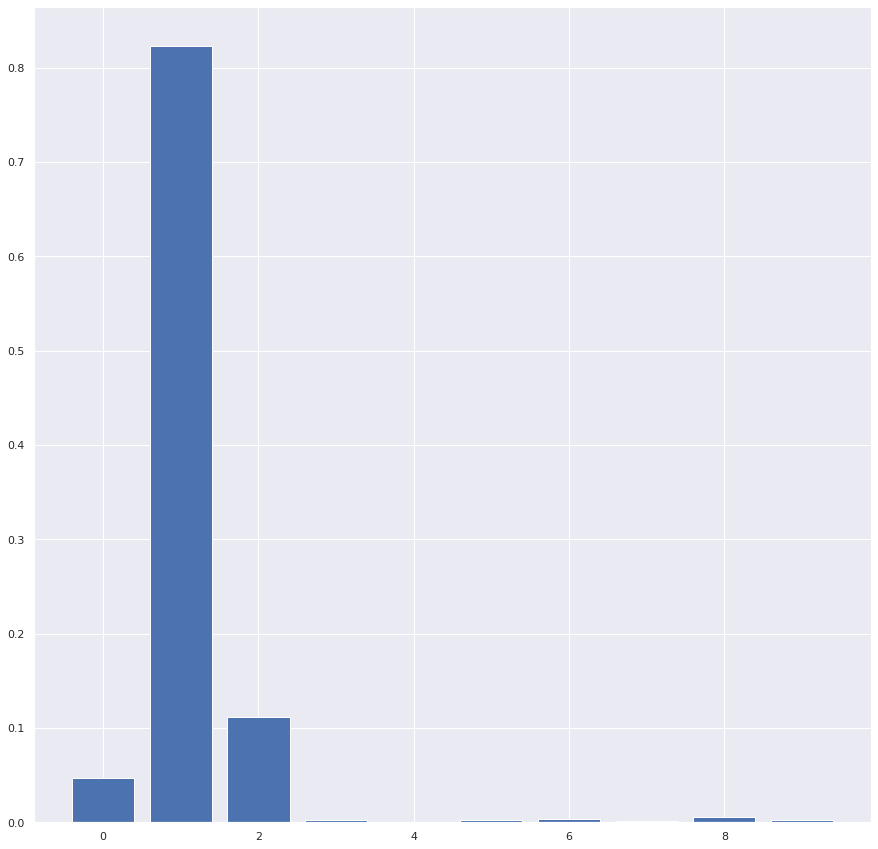

In [44]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
# define dataset
X = data.drop("Purchase",axis=1)  #independent columns
y = data['Purchase']    #target column i.e price range
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

From this we can say that 2nd, 3rd & 1st Feature are important in predicting target i.e., Product_Category_2, Product_Category_3 & Product_Category_1 in that order are important in Predicting Sales.

*   Now, will try RF model and for that we'll first determine the best parameters for RF.
*   We've choosen RF as that is an ensemble model which is a combination of multiple DTs.
*   Also here we'll use GridSearchCV as it traverses along the entire data set though time consuming.



*  Let us split our data to Train & Test, so that we can fit model on train data, predict target variable on Test data and then calculate error score between the predicted test value and actual test value.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (4712, 10)
X_test shape: (1179, 10)
Y_train shape: (4712,)
Y_test shape: (1179,)


In [46]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("RF Regressor ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
print("R2 score:", r2_score(Y_test, Y_pred_rf))

RF Regressor 
RMSE: 249995.74167814225
R2 score: 0.9435225557759422


In [48]:
from sklearn.model_selection import GridSearchCV
predictor = data.drop("Purchase", axis=1)
target = data["Purchase"]

# find the best parameter for model making
param_grid = {"n_estimators":[1, 5, 10, 50, 100, 150, 300, 500], \
              "max_depth":[1, 3, 5, 7, 9]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error").fit(predictor, target)
print("Best parameter: {}".format(grid_rf.best_params_))
print("Best score: {:.2f}".format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 100}
Best score: 197408.52



*   From the above result we can use that max_depth=9 and n_estimators=300 will give a better result for our model
*   Now, let us run RF Regressor with best parameters. 




In [49]:
# make model with best parameters
rf_best_model = RandomForestRegressor(n_estimators=300, max_depth=9, random_state=1, verbose=1)

*   Now that we've run the RF Regressor let us predict model's cross validation score.


In [50]:
# predict with cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, predictor, target, scoring="explained_variance", cv=5)
print(scores)
print("Model effectiveness: %f" % (scores.mean()))

[0.95178904 0.95990329 0.95798995 0.9519146  0.95567473]
Model effectiveness: 0.955454


From this we can say that RF Model effectiveness is 95%.

*   Now that we've run the RF Regressor with best parameters, let us fit it on our data and calculate RMSE.



In [51]:
rf_best_model.fit(X_train, Y_train)
Y_pred_rf_best = rf_best_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


Now, that we are done predicting values on Test data using RF. Let us calculate RMSE for the same.

In [52]:
print("RF Regressor with Best Parameters")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_rf_best)))
print("R2 score:", r2_score(Y_test, Y_pred_rf_best))

RF Regressor with Best Parameters
RMSE: 248288.61435372895
R2 score: 0.9442912488697153


*   As the R2 score is 94%, it is a good model.
*   Let us try XGBoost on this and see the score.



In [53]:
from xgboost import XGBRegressor 
xgb = XGBRegressor(random_state = 42)

xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)

[14:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [54]:
print("XGB Regressor")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB Regressor
RMSE: 253248.10291965344
R2 score: 0.9420434914526583


#### *   As the RMSE value has increased for XGB when compared to that of RF and even the R2 score of RF is better than XGB. We cannot go ahead with XGB at the current level. So, let us do Hyperparameter tuning on XGB.
#### *   Now, let us find the best parameters for XGB using RandomSearch CV. As we've already tried GridSearchCV on RF.



In [55]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]
params = {
"learning_rate"    : learning_rate,
"max_depth"        : max_depth,
"min_child_weight" : min_child_weight,
"gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}
xgb_tune = XGBRegressor(random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, verbose = 0, random_state = 42)
xgb_cv.fit(X_train, Y_train)

[14:05:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_alpha...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamm

In [56]:
print("best score:",xgb_cv.best_score_)
print("Best Params:",xgb_cv.best_params_)

best score: 0.9531515746847352
Best Params: {'min_child_weight': 52, 'max_depth': 7, 'learning_rate': '0.05', 'gamma': 0.2, 'colsample_bytree': 0.4}


#### Now that we've the best parameters, let us run model with best parameters

In [57]:
xgb_best = XGBRegressor(colsample_bytree = 0.4, gamma = 0.3, learning_rate = 0.05, max_depth = 7, min_child_weight = 52, verbosity = 0, random_state = 42)
xgb_best.fit(X_train, Y_train)
Y_pred_xgb_best = xgb_best.predict(X_test)
print("XGB regression with best parameters ") 
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best))) 
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression with best parameters 
RMSE: 283568.35398670036
R2 score: 0.9273349900071916


In [58]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
predictor = data.drop("Purchase", axis=1)
target = data["Purchase"]

# find the best parameter for model making
param_grid = {"n_estimators":[1, 5, 10, 50, 100, 150, 300, 500], \
              "max_depth":[1, 3, 5, 7, 9]}
xgb_tune_gscv = XGBRegressor(random_state = 42)
grid_xgb = GridSearchCV(xgb_tune_gscv, param_grid, cv=5, scoring="neg_mean_squared_error").fit(predictor, target)
print("Best parameter: {}".format(grid_xgb.best_params_))
print("Best score: {:.2f}".format((-1*grid_xgb.best_score_)**0.5))

[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [59]:
xgb_gscv_best = XGBRegressor( max_depth = 3, n_estimators=100)
xgb_gscv_best.fit(X_train, Y_train)
Y_pred_xgb_gscv_best = xgb_gscv_best.predict(X_test)
print("XGB regression with best parameters ") 
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_gscv_best))) 
print("R2 score:", r2_score(Y_test, Y_pred_xgb_gscv_best))

[14:08:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB regression with best parameters 
RMSE: 253248.10291965344
R2 score: 0.9420434914526583


In [60]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=Y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
y_pred_lgb=model.predict(X_test)
for i in range(0,185):
   if y_pred_lgb[i]>=0.5:
     y_pred_lgb[i]=1
   else:
     y_pred_lgb[i]=0
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred_lgb,Y_test)**0.5
print('RMSE for LGB:',rmse)
print("R2 score:", r2_score(Y_test, y_pred_lgb))

RMSE for LGB: 1033913.0812920444
R2 score: 0.03399833859756851


In [61]:
! pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=7ba5052e4eb295d42b7ace54904c9a1824f4dfb4e96fc907abdd6336f1674a6b
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [62]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  dtrain = lgb.Dataset(data=X, label=y)
  def lgb_r2_score(preds, dtrain):
      labels = dtrain.get_label()
      return 'r2', r2_score(labels, preds), True
  # Objective Function
  def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
        
          params = {'application':'regression','num_iterations': num_iterations,
                    'learning_rate':0.05, 'early_stopping_round':50,
                    'metric':'lgb_r2_score'} # Default parameters
          params["num_leaves"] = int(round(num_leaves))
          params['feature_fraction'] = max(min(feature_fraction, 1), 0)
          params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
          params['max_depth'] = int(round(max_depth))
          params['min_split_gain'] = min_split_gain
          params['min_child_weight'] = min_child_weight
          cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_r2_score)
          # print(cv_results)
          return np.max(cv_results['r2-mean'])
  # Domain space-- Range of hyperparameters 
  pds = {'num_leaves': (80, 100),
            'feature_fraction': (0.1, 0.9),
            'bagging_fraction': (0.8, 1),
            'max_depth': (17, 25),
            'min_split_gain': (0.001, 0.1),
            'min_child_weight': (10, 25)
            }

  # Surrogate model
  optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    
  # Optimize
  optimizer.maximize(init_points=init_iter, n_iter=n_iters)

bayesion_opt_lgbm(X, y, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 200)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.9539   |  0.9838   |  0.6138   |  23.03    |  12.09    |  0.009645 |  95.76    |
|  2        |  0.9532   |  0.8652   |  0.5329   |  18.92    |  18.18    |  0.04065  |  94.3     |
|  3        |  0.9533   |  0.9673   |  0.5708   |  19.37    |  14.22    |  0.07085  |  88.45    |
|  4        |  0.9541   |  0.8115   |  0.6976   |  20.62    |  12.64    |  0.005888 |  85.85    |
|  5        |  0.9539   |  0.8134   |  0.7009   |  17.51    |  16.48    |  0.03705  |  83.04    |
|  6        |  0.9529   |  0.8983   |  0.3464   |  24.09    |  24.98    |  0.0118   |  80.1     |
|  7        |  0.9536   |  0.841    |  0.5558   |  24.15    |  10.31    |  0.0734   |  99.81    |
|  8        |  0.9526   |  0.9433   |  0.3055   |  17.2     |  24.43    |  0.002452 |  99.76    |
|  9        |  0.954

In [63]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=Y_train)
params = {'learning_rate':0.001,
          'num_leaves': 85,
            'feature_fraction': 0.6976,
            'bagging_fraction': 0.8115,
            'max_depth': 20,
            'min_split_gain': 0.005888,
            'min_child_weight': 12.64}
model= lgb.train(params, train_data, 100)
y_pred_lgb_hyp=model.predict(X_test)
for i in range(0,185):
   if y_pred_lgb_hyp[i]>=0.5:
     y_pred_lgb_hyp[i]=1
   else:
     y_pred_lgb_hyp[i]=0
from sklearn.metrics import mean_squared_error
rmse_hyp=mean_squared_error(y_pred_lgb_hyp,Y_test)**0.5
print('RMSE for LGB:',rmse_hyp)
print("R2 score:", r2_score(Y_test, y_pred_lgb_hyp))

RMSE for LGB: 1036510.2176777158
R2 score: 0.02913915044167581


In [66]:
# automatic nested cross-validation for random forest on a regression dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# create dataset
#X, y = make_regression(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestRegressor(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='neg_mean_squared_error', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='neg_mean_squared_error', cv=cv_outer, n_jobs=-1)
	# execute search
result = search.fit(X_train, Y_train)
	# get the best performing model fit on the whole training set
best_model = result.best_estimator_
	# evaluate model on the hold out dataset
yhat = best_model.predict(X_test)
	# evaluate the model
Rmse=np.sqrt(mean_squared_error(Y_test, yhat))
	# store the result
outer_results=[]
outer_results.append(Rmse)
	# report progress
print('>RMSE=%.3f, est=%.3f, cfg=%s' % (Rmse, result.best_score_, result.best_params_))

>acc=242603.800, est=-34502311395.019, cfg={'max_features': 4, 'n_estimators': 500}
Accuracy: 242603.800 (0.000)


In [67]:
# automatic nested cross-validation for XGB regression dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
# create dataset
#X, y = make_regression(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = XGBRegressor(random_state=1)
# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
# define search
search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring='neg_root_mean_squared_error', cv=cv_outer, n_jobs=-1)
	# execute search
result = search.fit(X_train, Y_train)
	# get the best performing model fit on the whole training set
best_model = result.best_estimator_
	# evaluate model on the hold out dataset
yhat_xgb_nested = best_model.predict(X_test)
	# evaluate the model
xgb_nested_Rmse=np.sqrt(mean_squared_error(Y_test, yhat_xgb_nested))
	# store the result
outer_results=[]
outer_results.append(xgb_nested_Rmse)
	# report progress
print('>RMSE=%.3f, est=%.3f, cfg=%s' % (xgb_nested_Rmse, result.best_score_, result.best_params_))

[14:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [68]:
RMSE=[]
RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred_rf)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred_rf_best)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_gscv_best)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, y_pred_lgb)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, y_pred_lgb_hyp)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, yhat)))
RMSE.append(np.sqrt(mean_squared_error(Y_test, yhat_xgb_nested)))
print(RMSE)

[249995.74167814225, 248288.61435372895, 253248.10291965344, 283568.35398670036, 253248.10291965344, 1033913.0812920444, 1036510.2176777158, 242603.80045630658, 253248.10291965344]


In [69]:
R2=[]
R2.append(r2_score(Y_test, Y_pred_rf))
R2.append(r2_score(Y_test, Y_pred_rf_best))
R2.append(r2_score(Y_test, Y_pred_xgb))
R2.append(r2_score(Y_test, Y_pred_xgb_best))
R2.append(r2_score(Y_test, Y_pred_xgb_gscv_best))
R2.append(r2_score(Y_test, y_pred_lgb))
R2.append(r2_score(Y_test, y_pred_lgb_hyp))
R2.append(r2_score(Y_test, yhat))
R2.append(r2_score(Y_test, yhat_xgb_nested))
print(R2)

[0.9435225557759422, 0.9442912488697153, 0.9420434914526583, 0.9273349900071916, 0.9420434914526583, 0.03399833859756851, 0.02913915044167581, 0.9468130590082411, 0.9420434914526583]


#### Will create a dataframe to hold the loss function values for different models

In [77]:
loss_fun_df = pd.DataFrame(RMSE, index =['Random Forest', 'Random Forest with Best Params from GridSearchCV', 'XGB Regressor', 'XGB Regressor with Best Params from RandomSearchCV','XGB Regressor with Best Params from GridSearchCV','Light Gradient Boost Regression','LGB With Best Params from Bayessian Optimization','RF with Nested K-Fold CV','XGB with Nested K-Fold CV'], 
                                              columns =['RMSE'])
loss_fun_df['R-Square']=R2

#### Find model with least RMSE Value

In [79]:
loss_fun_df.style.highlight_min(['RMSE'])

,RMSE,R-Square
Random Forest,249995.741678,0.943523
Random Forest with Best Params from GridSearchCV,248288.614354,0.944291
XGB Regressor,253248.102920,0.942043
XGB Regressor with Best Params from RandomSearchCV,283568.353987,0.927335
XGB Regressor with Best Params from GridSearchCV,253248.102920,0.942043
Light Gradient Boost Regression,1033913.081292,0.033998
LGB With Best Params from Bayessian Optimization,1036510.217678,0.029139
RF with Nested K-Fold CV,242603.800456,0.946813
XGB with Nested K-Fold CV,253248.102920,0.942043


#### Find model with max R-Square value

In [76]:
loss_fun_df.style.highlight_max(['R-Square'])

,RMSE,R-Square
Random Forest,249995.741678,0.943523
Random Forest with Best Params from GridSearchCV,248288.614354,0.944291
XGB Regressor,253248.102920,0.942043
XGB Regressor with Best Params from RandomSearchCV,283568.353987,0.927335
XGB Regressor with Best Params from GridSearchCV,253248.102920,0.942043
Light Gradient Boost Regression,1033913.081292,0.033998
LGB With Best Params from Bayessian Optimization,1036510.217678,0.029139
RF with Nested K-Fold CV,242603.800456,0.946813
XGB with Nested K-Fold CV,253248.102920,0.942043


# **Conclusion**:
#### * From the above we can say that Random Forest with Hyperparameter tuning using Nested K-Fold Cross Validation resulted in less RMSE and better R2 Score
#### * So, we can consider Random Forest Regressor with Nested K-Fold CrossValidation as our best model.